### Example for `rdsutils.plot`

In [1]:
import sys, warnings
sys.path.insert(1, '..')

warnings.filterwarnings(action='ignore')
import pandas as pd
from rdsutils import plot
import matplotlib.pyplot as plt

plt.style.use('ggplot')
# plt.style.use('seaborn-poster')
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_parquet('artifact/plotting_preds.parquet')

In [3]:
df.head()

,transaction_datetime,ach_target,fico_pred,deposit_v1_pred,deposit_v1_updated_pred,boruta_pred
2941897,2020-06-01 18:01:07,False,-737.0,0.002370,0.113082,0.211817
2943349,2020-07-24 18:01:27,False,-791.0,0.000602,0.140603,0.049288
2943363,2020-06-29 18:01:28,False,-606.0,0.013313,0.263254,0.383593
2943565,2020-05-07 18:01:06,False,-769.0,0.000924,0.121055,0.089387
2948548,2020-05-05 18:01:06,False,-836.0,0.000891,0.077927,0.040066


#### Plot hist by target

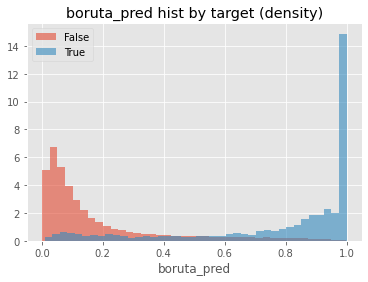

In [4]:
plot.hist_by_target('boruta_pred', 'ach_target', df)

#### Plot single precision recall curve

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'2-class Precision-Recall curve: AP = 0.6570954421914773'}, xlabel='Recall', ylabel='Precision'>)

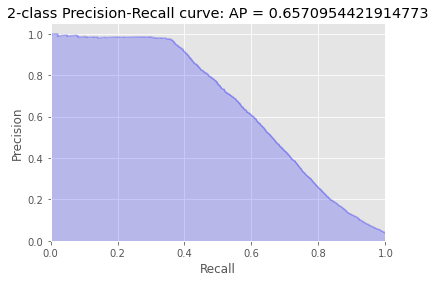

In [5]:
plot.plot_pr_curve(df.boruta_pred, df.ach_target)

#### Plot multiple precision recall curves on the same canvas

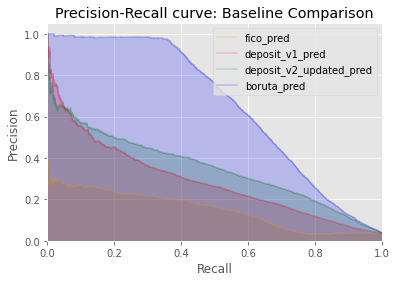

In [6]:
preds = [(df['fico_pred'], 'fico_pred'),
         (df['deposit_v1_pred'], 'deposit_v1_pred'), 
         (df['deposit_v1_updated_pred'], 'deposit_v2_updated_pred'),
         (df['boruta_pred'], 'boruta_pred')]
title = 'Precision-Recall curve: Baseline Comparison'
fig, ax = plot.plot_pr_curve_mult(df['ach_target'], preds,
                        title=title, colors = ['orange', 'r', 'g', 'b'])

#### Plot a single ROC curve

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'2-class AUC ROC curve: AUC = 0.9286723669752607'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>)

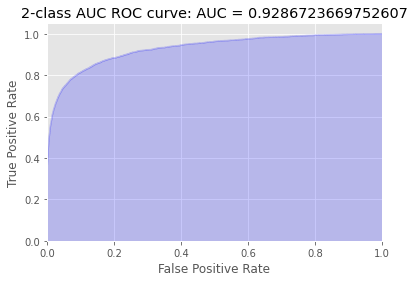

In [7]:
plot.plot_auc_curve(df.boruta_pred, df.ach_target)

#### Plot multiple ROC curves on the same canvas

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'AUC-ROC curve: Baseline Comparison'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>)

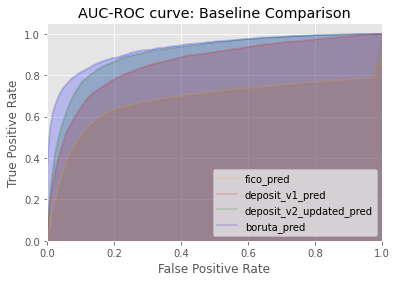

In [8]:
preds = [(df['fico_pred'], 'fico_pred'),
         (df['deposit_v1_pred'], 'deposit_v1_pred'), 
         (df['deposit_v1_updated_pred'], 'deposit_v2_updated_pred'),
         (df['boruta_pred'], 'boruta_pred')]
title = 'AUC-ROC curve: Baseline Comparison'
plot.plot_auc_curve_mult(df['ach_target'], preds,
                         title=title, colors = ['orange', 'r', 'g', 'b'])

#### Plot feature over time

(<Figure size 1296x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'mean'}, xlabel='dt'>,
        <AxesSubplot:title={'center':'median'}, xlabel='dt'>,
        <AxesSubplot:title={'center':'count'}, xlabel='dt'>], dtype=object))

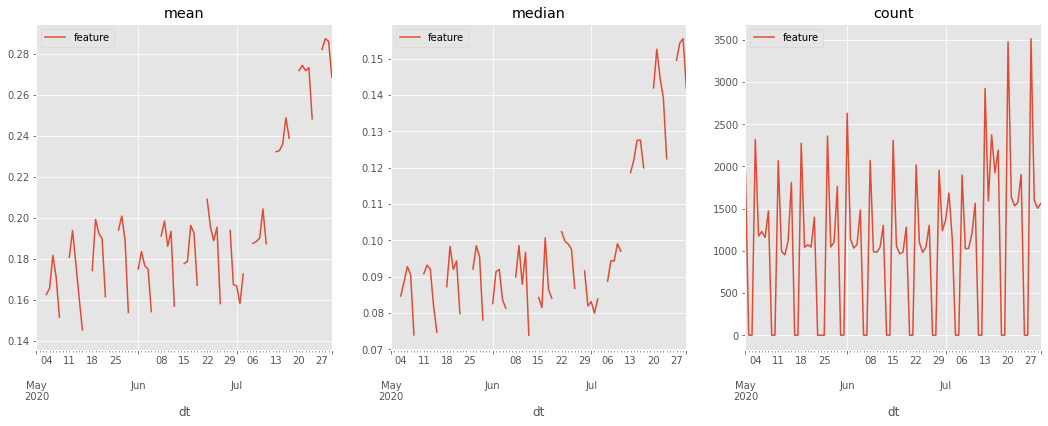

In [9]:
plot.plot_feature_over_time(df.transaction_datetime, df.boruta_pred)

### Some ploting utils from external packages
---

In [13]:
# !pip install scikit-plot
import scikitplot as skplt
import numpy as np

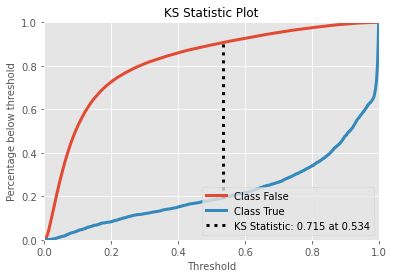

In [14]:
pred_probas = np.stack([1-df.boruta_pred, df.boruta_pred]).T
plot = skplt.metrics.plot_ks_statistic(y_true=df.ach_target,
                                       y_probas=pred_probas)

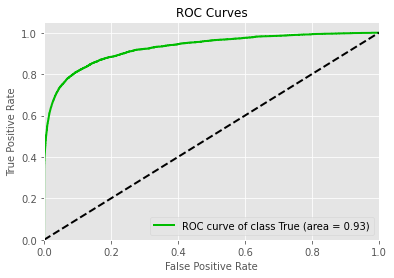

In [15]:
plot = skplt.metrics.plot_roc(y_true=df.ach_target, 
                              y_probas=pred_probas,
                              plot_macro=False,
                              plot_micro=False, 
                              classes_to_plot=[1])

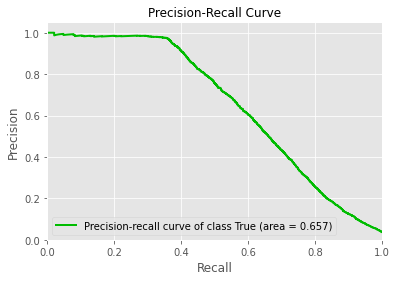

In [16]:
plot = skplt.metrics.plot_precision_recall(y_true=df.ach_target, 
                                           y_probas=pred_probas,
                                           plot_micro=False, 
                                           classes_to_plot=[1])